Regressão Linear
Prática do conteúdo visto. O objetivo é prever o custo da diária de um imóvel baseado no número de pessoas
#Importação das bibliotecas necessárias

In [4]:
import pandas as pd
import plotly.express as px #Criação de gráficos dinámicos
import seaborn as sns #Biblioteca para gráficos
import numpy as np #funções matemáticas de alto nível


#Abrindo o arquivo com o conteúdo

In [5]:
base_custo_diaria = pd.read_csv('base_custo_diaria.csv', sep = ';')

#Visualizando arquivo

In [6]:
#visualizando arquivos
base_custo_diaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,4,385
2,6,499
3,10,680
4,13,735


In [7]:
#algumas estatísticas da base de dados
base_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


#Criação das variáveis do modelo

In [8]:
#criando variável independente
x_custo_diaria = base_custo_diaria.iloc[:,0].values
x_custo_diaria

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [9]:
#criando variável dependente (a que queremos estimar/predizer)
y_custo_diaria = base_custo_diaria.iloc[:,1].values
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

#Visualização em formato de matriz

In [11]:
np.corrcoef(x_custo_diaria,y_custo_diaria)

array([[1.        , 0.99206905],
       [0.99206905, 1.        ]])

# Correlação

Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;

Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;

Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.

<Axes: >

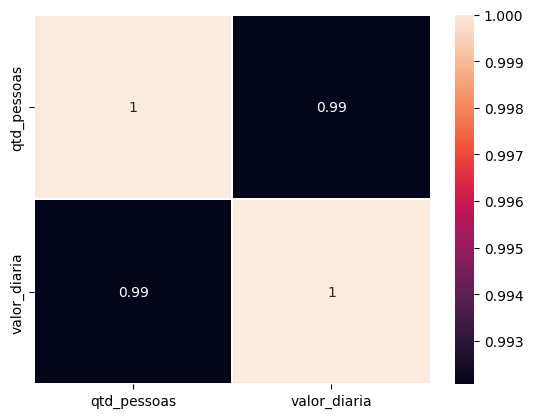

In [10]:
correlation = base_custo_diaria.corr()
#plot da matriz da correção
plot = sns.heatmap(correlation, annot=True, linewidths=.3)
plot

Perceba que temos uma correlçao forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diária também aumenta.
Além disso, podemos dizer que em 99% do valor cobrado pelas diárias pode ser explicado pela quantidade de pessoas alugando o imóvel.

#Tratando os dados para o modelo
Nesse passo vamos realizar transformações nos dados. Essa transformação deve ser feita para que os dados possam ter o formato que o algoritmo solicitada como entrada.

In [ ]:
#visualizar formato da variável
x_custo_diaria.shape

(15,)

In [ ]:
#visualizando variável
x_custo_diaria #o resultado mostra que temos uma array com apenas uma coluna. No entanto, precisamos ter uma matriz com 2 colunas

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [ ]:
x_custo_diaria = x_custo_diaria.reshape(-1,1)
x_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [ ]:
x_custo_diaria.shape

(15, 1)

#Aplicando os dados ao algoritmo de machine de regressão

In [ ]:
from sklearn.linear_model import LinearRegression
#cria um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [ ]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

#Realizando o treinamento do modelo

In [ ]:
previsao_custo_diaria.fit(x_custo_diaria, y_custo_diaria)

LinearRegression()

In [ ]:
#Verificando a interceptação
previsao_custo_diaria.intercept_

155.91874556932066

In [ ]:
#verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

array([48.61472504])

In [ ]:
#estimando o custo do imóvel alugado
previsao_precos = previsao_custo_diaria.predict(x_custo_diaria)
previsao_precos

#Visualizando no gráfico as disposições dos dados
Para visualizar os dados no gráfico, temos que transformar os valores das variáveis para o formato de vetor

In [ ]:
#verificando tipo da variável
x_custo_diaria

In [ ]:
#a variávele stá em matriz, para plotar temos que converter para array novamente
x_custo_diaria.ravel()

In [ ]:
#visualizando a outra variável
y_custo_diaria
#está no formato certo, array

In [ ]:
grafico = px.scatter(x = x_custo_diaria.ravel(),y = y_custo_diaria)
grafico.show()

In [ ]:
grafico = px.scatter(x = x_custo_diaria.ravel(),y = y_custo_diaria)
grafico.add_scatter(x = x_custo_diaria.ravel(), y = previsao_precos, name='Previsões')

In [ ]:
#Verificando os valores de uma determinada previsão baseada na quantidade de pessoas
qtd_pessoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([350.37764575])

In [ ]:
qtd_pessoas = 42
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([2197.73719745])

In [ ]:
#verificando de modo direto
previsao_custo_diaria.predict([[42]])

array([2197.73719745])

In [ ]:
#indica a qualidade do algoritmo, quanto mais próximo de 1, melhor
previsao_custo_diaria.score(x_custo_diaria, y_custo_diaria)

0.984200996064679

In [ ]:
#visualizando os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_custo_diaria, previsao_precos)
mse

9989.829839426571

In [ ]:
#calculando MAE
mean_absolute_error(y_custo_diaria, previsao_precos)

83.84480977618742

In [ ]:
#calculando o RMSE
np.sqrt(mse)

99.9491362615334